# Import Library

Berikut adalah library yang digunakan dalam notebook ini.

In [37]:
import numpy as np                          # linear algebra
import pandas as pd                         # data processing
import skfuzzy as fuzz                      # fuzzy logic
import matplotlib.pyplot as plt 

In [38]:
# visualization
plt.style.use('seaborn-whitegrid')          # graph settings
plt.rcParams['figure.figsize'] = (10, 5)    # graph settings

# Problem Statements

Ada 3 lokasi kost yang akan menjadi alternatif, yaitu:
- A1 = Babarsari
- A2 = Karang Malang
- A3 = Gejayan

Ada 5 atribut (kriteria) yang digunakan untuk pertimbangan:
- C1 = Jarak dari UNY
- C2 = Fasilitas
- C3 = Kebersihan
- C4 = Biaya Bulanan
- C5 = Keamanan

Tujuan keputusan ini adalah mencari lokasi kos terbaik sebagai tempat tinggal berdasarkan kriteria – kriteria tertentu.

𝑇(𝑘𝑒𝑝𝑒𝑛𝑡𝑖𝑛𝑔𝑎𝑛)𝑊={𝑆𝑅,𝑅,𝐶,𝑇,𝑆𝑇}
<br>
𝑇(𝑘𝑒𝑐𝑜𝑐𝑜𝑘𝑎𝑛)𝑆={𝑆𝐾,𝐾,𝐶,𝐵,𝑆𝐵}

# Himpunan Fuzzy

Fungsi keanggotaan untuk setiap elemen direpresentasikan dengan menggunakan bilangan fuzzy segitiga sebagai berikut:
- SR = SK = (0, 0, 0.25)
- R = K = (0, 0.25, 0.5)
- C = (0.25, 0.5, 0.75)
- T = B = (0.5, 0.75, 1)
- ST = SB = (0.75, 1, 1)

In [39]:
# Generate universe variables for input
kepentingan = np.arange(0.0, 1, 0.01)
kecocokan = np.arange(0.0, 1, 0.01)

In [40]:
SR = SK = [0, 0, 0.25]
R  = K  = [0, 0.25, 0.5]
C       = [0.25, 0.5, 0.75]
T  = B  = [0.5, 0.75, 1]
ST = SB = [0.75, 1, 1]

In [41]:
# Generate fuzzy membership functions for Kepentingan
plot_sr  = fuzz.trimf(kepentingan, SR)
plot_r   = fuzz.trimf(kepentingan, R)
plot_c   = fuzz.trimf(kepentingan, C)
plot_t   = fuzz.trimf(kepentingan, T)
plot_st  = fuzz.trimf(kepentingan, ST)

# Generate fuzzy membership functions for Kecocokan
plot_sk  = fuzz.trimf(kecocokan, SK)
plot_k   = fuzz.trimf(kecocokan, K)
plot_ck  = fuzz.trimf(kecocokan, C)
plot_b   = fuzz.trimf(kecocokan, B)
plot_sb  = fuzz.trimf(kecocokan, SB)

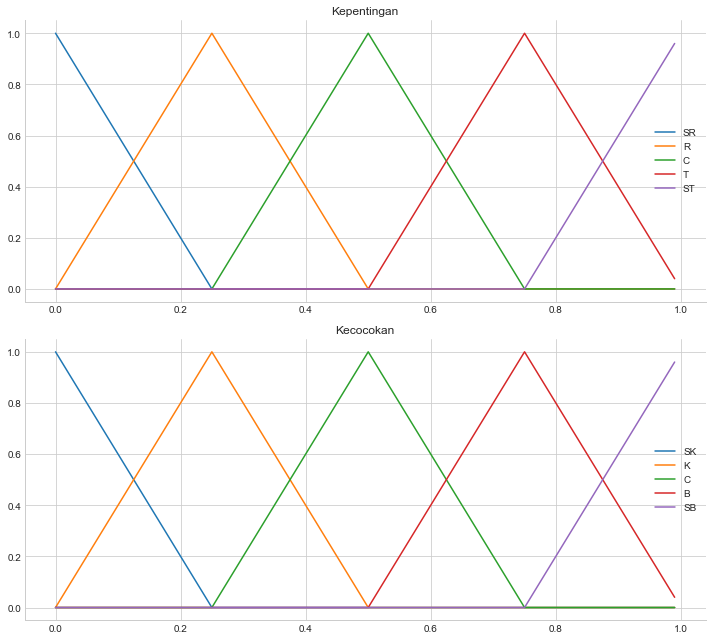

In [42]:
# Visualize these universes and membership functions
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 9))

ax0.plot(kepentingan, plot_sr, linewidth=1.5, label='SR')
ax0.plot(kepentingan, plot_r, linewidth=1.5, label='R')
ax0.plot(kepentingan, plot_c, linewidth=1.5, label='C')
ax0.plot(kepentingan, plot_t, linewidth=1.5, label='T')
ax0.plot(kepentingan, plot_st, linewidth=1.5, label='ST')
ax0.set_title('Kepentingan')
ax0.legend()

ax1.plot(kecocokan, plot_sk, linewidth=1.5, label='SK')
ax1.plot(kecocokan, plot_k, linewidth=1.5, label='K')
ax1.plot(kecocokan, plot_ck, linewidth=1.5, label='C')
ax1.plot(kecocokan, plot_b, linewidth=1.5, label='B')
ax1.plot(kecocokan, plot_sb, linewidth=1.5, label='SB')
ax1.set_title('Kecocokan')
ax1.legend()

# Turn off top/right axes
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Matriks Rating Kepentingan & Kecocokan

In [43]:
rating_kepentingan = np.array((T, C, C, T, ST))

In [44]:
A1 = np.array((C, B, SB, C, K))
A2 = np.array((SB, SK, K, SB, C))
A3 = np.array((B, SB, B, SK, B))

In [45]:
Y1, Q1, Z1 = np.sum(A1 * rating_kepentingan,axis=0) / len(A1)
Y2, Q2, Z2 = np.sum(A2 * rating_kepentingan,axis=0) / len(A2)
Y3, Q3, Z3 = np.sum(A3 * rating_kepentingan,axis=0) / len(A3)

In [46]:
Y = np.array((Y1,Y2,Y3)).reshape(-1,1)
Q = np.array((Q1,Q2,Q3)).reshape(-1,1)
Z = np.array((Z1,Z2,Z3)).reshape(-1,1)

In [47]:
alpha = 0

In [48]:
I_total = 1/2 * ((alpha * Z) + Q + (1 - alpha)*Y)

In [49]:
I_total

array([[0.24375],
       [0.30625],
       [0.3125 ]])

# Decision Making Function

In [50]:
class mcdm_func():
    
    def __init__(self,rating_kpt,rating_kcc,alpha):
        self.rating_kpt = np.array(rating_kpt)
        self.rating_kcc = np.array(rating_kcc)
        self.alpha = alpha
                
    def output(self):
        for i in range(self.rating_kcc.shape[0]):
            if i == 0:
                YQZ = np.sum(self.rating_kcc[i] * self.rating_kpt,axis=0) / len(self.rating_kcc[i])
            else:
                yqz_calc = np.sum(self.rating_kcc[i] * self.rating_kpt,axis=0) / len(self.rating_kcc[i])
                YQZ = np.vstack((YQZ, yqz_calc))
        alpha = self.alpha
        n_total_integral = (1/2 * (alpha * YQZ[:,2] + YQZ[:,1] + (1 - alpha)*YQZ[:,0])).reshape(-1,1)
        return n_total_integral

In [51]:
rating_kcc = [A1,A2,A3]
rating_kpt = [T, C, C, T, ST]
list_alpha = [0, 0.5, 0.75, 1]

In [52]:
for i,alpha in enumerate(list_alpha):
    aa = mcdm_func(rating_kpt,rating_kcc,alpha).output()
    if i == 0:
        hasil = pd.DataFrame(aa,columns=['alpha {al}'.format(al=alpha)])
    else:
        hasil['alpha {al}'.format(al=alpha)] = aa

In [53]:
hasil

,alpha 0,alpha 0.5,alpha 0.75,alpha 1
0,0.24375,0.390625,0.464062,0.53750
1,0.30625,0.425000,0.484375,0.54375
2,0.31250,0.453125,0.523438,0.59375


# Kesimpulan 
Dari tabel tersebut, terlihat bahwa A3 memiliki nilai total integral terbesar berapapun derajat keoptimisannya, sehingga lokasi Gejayan akan terpilih sebagai lokasi terbaik dalam menentukan kost sebagai tempat tinggal.
